In [4]:
import numpy as np
arr1 = np.array([7,8,9,10])
arr2 = np.array([1,2,3,4])


In [5]:
arr3 = arr1 + arr2
print(arr3)

[ 8 10 12 14]


In [6]:
arr3 = arr3 * arr1
print(arr3)


[ 56  80 108 140]


In [7]:
print(arr3[2])

108


In [8]:
import numpy as np
arr = np.array([[4,2,0,5],[1,3,5,7]])
print(arr.size)

8


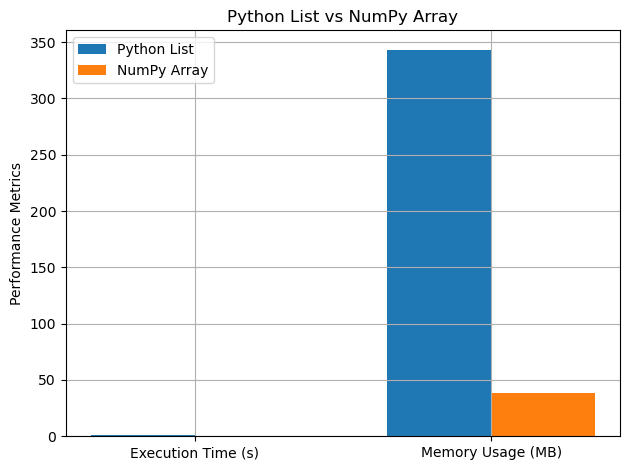

In [9]:
import time
import sys
import numpy as np
import matplotlib.pyplot as plt

# Dataset size
N = 10_000_000

# ---- Python List ----
start = time.time()
py_list = list(range(N))
py_result = [x * 2 for x in py_list]
py_time = time.time() - start

# Approximate memory: list container + elements (estimated using sample)
sample_size = 1000
list_memory_est = sys.getsizeof(py_list) + sum(sys.getsizeof(x) for x in py_list[:sample_size]) * (N // sample_size)

# ---- NumPy Array ----
start = time.time()
np_array = np.arange(N)
np_result = np_array * 2
np_time = time.time() - start
np_memory = np_array.nbytes

# Convert memory to MB
py_memory_mb = list_memory_est / (1024 ** 2)
np_memory_mb = np_memory / (1024 ** 2)

# Prepare data for plotting
labels = ['Execution Time (s)', 'Memory Usage (MB)']
py_data = [py_time, py_memory_mb]
np_data = [np_time, np_memory_mb]

# Plotting
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, py_data, width, label='Python List')
ax.bar(x + width/2, np_data, width, label='NumPy Array')

ax.set_ylabel('Performance Metrics')
ax.set_title('Python List vs NumPy Array')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Scitific simulation(Projectile motion)
#Task: sumulate the height of a ball thrown with an initial velocity over 1 million time steps.
import numpy as np

t = np.linspace(0, 10, 1_000_000)
v0 = 50  # m/s
g = 9.8  # m/s^2
height = v0 * t - 0.5 * g * t**2
print(height)

[0.0000000e+00 5.0000001e-04 9.9999904e-04 ... 1.0000960e+01 1.0000480e+01
 1.0000000e+01]


In [11]:
t = [i * 10 / 1_000_000 for i in range(1_000_000)]
v0 = 50
g = 9.8
height1 = [v0 * ti - 0.5 * g * ti**2 for ti in t]
print(height1)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
#Task:
#Calculate moving average of daily stock prices for the past 5 years (~1250 trading days)
prices = np.random.rand(1250) * 100
moving_avg = np.convolve(prices, np.ones(5)/5, mode='valid')
print(moving_avg)

[54.99311092 66.17779233 51.78435106 ... 64.28682527 77.94665081
 77.80433388]


In [13]:
# Re-running due to code execution state reset
import random
import time
import sys

# Start time
start_time = time.time()

# Generate 1250 random stock prices between 0 and 100
prices = [random.random() * 100 for _ in range(1250)]

# Calculate 5-day moving average using list comprehension
moving_avg = [sum(prices[i:i+5])/5 for i in range(len(prices) - 4)]

# End time
end_time = time.time()

# Measure time taken
execution_time = end_time - start_time

# Estimate memory used
# Size of prices list + size of moving_avg list
sample_size = 100
prices_memory = sys.getsizeof(prices) + sum(sys.getsizeof(x) for x in prices[:sample_size]) * (len(prices) // sample_size)
moving_avg_memory = sys.getsizeof(moving_avg) + sum(sys.getsizeof(x) for x in moving_avg[:sample_size]) * (len(moving_avg) // sample_size)

total_memory = (prices_memory + moving_avg_memory) / (1024 ** 2)  # Convert to MB

execution_time, total_memory, moving_avg[:10]


(0.000537872314453125,
 0.0764617919921875,
 [49.17933251753014,
  32.83007810954765,
  46.423930063701945,
  34.99080395704304,
  46.6140805344736,
  38.0705449527732,
  55.48776159289298,
  41.90327291032781,
  49.15430759419119,
  47.03988898306721])

In [14]:
import numpy as np
from PIL import Image
import time
import os

# Generate a dummy sample image (if not already available)
from PIL import ImageDraw

img = Image.new("RGB", (1024, 768), color="white")
draw = ImageDraw.Draw(img)
for i in range(0, 1024, 50):
    draw.line((i, 0, i, 768), fill="gray", width=1)
for j in range(0, 768, 50):
    draw.line((0, j, 1024, j), fill="gray", width=1)
img.save("sample.jpg")

# Load image and convert to numpy array
start_time = time.time()
img = np.array(Image.open("sample.jpg"))

# Convert to grayscale using matrix operation
gray = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
end_time = time.time()

# Speed in seconds
execution_time = end_time - start_time

# Memory usage of image and grayscale array
img_memory = img.nbytes / (1024 ** 2)  # in MB
gray_memory = gray.nbytes / (1024 ** 2)  # in MB

execution_time, img_memory, gray_memory, gray.shape


(0.07321834564208984, 2.25, 6.0, (768, 1024))

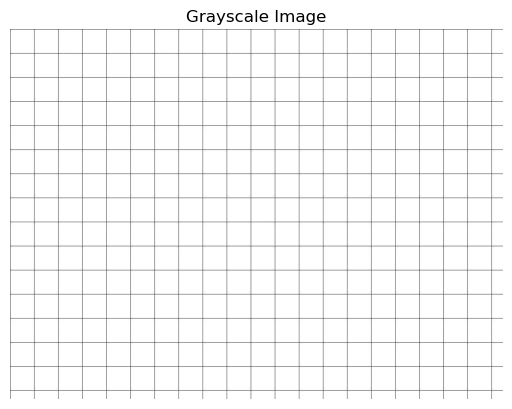

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

# Convert grayscale array to uint8 for display
gray_uint8 = gray.astype(np.uint8)

# Display the grayscale image
plt.imshow(gray_uint8, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


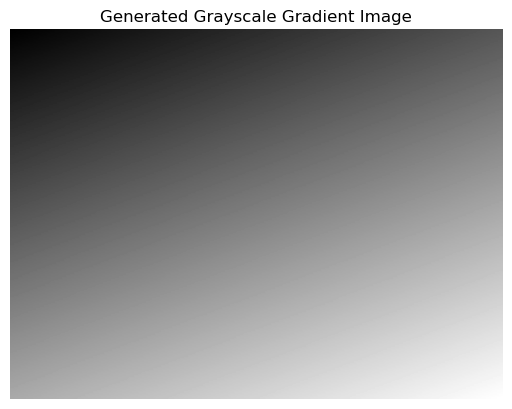

In [16]:
from PIL import Image, ImageDraw

# Create a new RGB image with color gradient
width, height = 1024, 768
img_gradient = Image.new("RGB", (width, height))
draw = ImageDraw.Draw(img_gradient)

for x in range(width):
    for y in range(height):
        r = int(255 * (x / width))
        g = int(255 * (y / height))
        b = 128
        draw.point((x, y), fill=(r, g, b))

# Convert to NumPy array and grayscale
img_array = np.array(img_gradient)
gray_image = np.dot(img_array[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Display
plt.imshow(gray_image, cmap='gray')
plt.title("Generated Grayscale Gradient Image")
plt.axis('off')
plt.show()


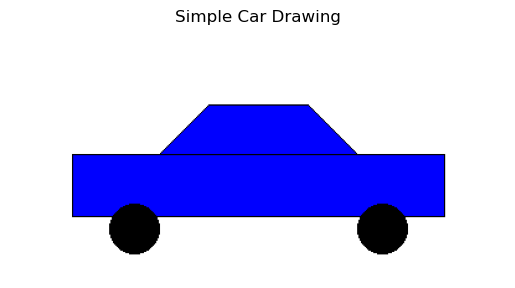

In [17]:
from PIL import Image, ImageDraw

# Create blank canvas
width, height = 400, 200
car_img = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(car_img)

# Draw car body
draw.rectangle([50, 100, 350, 150], fill="blue", outline="black")

# Draw car top
draw.polygon([(120, 100), (160, 60), (240, 60), (280, 100)], fill="blue", outline="black")

# Draw wheels
draw.ellipse([80, 140, 120, 180], fill="black")
draw.ellipse([280, 140, 320, 180], fill="black")

# Convert to numpy array for viewing
car_array = np.array(car_img)

# Display
plt.imshow(car_array)
plt.title("Simple Car Drawing")
plt.axis("off")
plt.show()


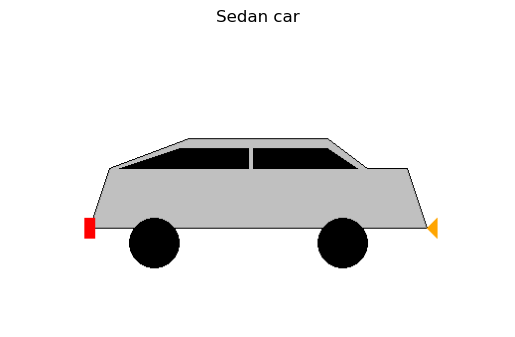

In [21]:
!pip install pillow
from PIL import Image, ImageDraw

# Create canvas
width, height = 500, 300
car_img = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(car_img)

# Draw car body
draw.polygon([(80, 200), (100, 140), (180, 110), (320, 110), (360, 140), (400, 140), (420, 200)], fill="silver", outline="black")

# Draw windows
draw.polygon([(110, 140), (170, 120), (240, 120), (240, 140)], fill="black")
draw.polygon([(245, 120), (320, 120), (350, 140), (245, 140)], fill="black")

# Draw wheels
draw.ellipse([(120, 190), (170, 240)], fill="black")
draw.ellipse([(310, 190), (360, 240)], fill="black")

# Draw headlights
draw.polygon([(420, 200), (430, 190), (430, 210)], fill="orange")

# Draw rear light
draw.rectangle([(75, 190), (85, 210)], fill="red")

# Save or show the image
car_img.show()
# car_img.save("stylized_car.png")
car_arr = np.array(car_img)

plt.imshow(car_arr)
plt.title("Sedan car")
plt.axis("off")
plt.show()

In [1]:
#difference betweeen vstack() and Hstack()

import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])

# vstack arrays
c = np.vstack((a,b))
print("After vstack: \n",c)
# hstack arrays
d = np.hstack((a,b))
print("After hstack: \n",d)

After vstack: 
 [[1 2 3]
 [4 5 6]]
After hstack: 
 [1 2 3 4 5 6]


In [3]:
# Non-vectorized
c = []
for i in range(len(a)):
    c.append(a[i] + b[i])


In [5]:
print(c)

[5, 7, 9]


In [7]:
#vectorized
a = np.array([1,2,3])
b = np.array([4,5,6])
c = a + b
print(c)

[5 7 9]


In [9]:
#example that demonstrates both vectorization and broadcasting working together in NumPy:
import numpy as np

# Original 2D array
data = np.array([
    [10, 20, 30],
    [40, 50, 60],
    [70, 80, 90]
])

# Step 1: Compute row-wise mean (vectorized)
row_means = np.mean(data, axis=1, keepdims=True)  # Shape (3, 1)

# Step 2: Subtract row means from each row (broadcasting + vectorized)
result = data - row_means

print("Original data:\n", data)
print("\nRow-wise means:\n", row_means)
print("\nResult after subtracting row mean:\n", result)


Original data:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]

Row-wise means:
 [[20.]
 [50.]
 [80.]]

Result after subtracting row mean:
 [[-10.   0.  10.]
 [-10.   0.  10.]
 [-10.   0.  10.]]


In [19]:
# Write a program to add a border of zeros around the existing array.
import numpy as np
ones_arr = np.full((3,3),1)

print("Transformed array:")
transformed_array = np.pad(ones_arr, pad_width=1, mode='constant', constant_values=0)
print(transformed_array)

Transformed array:
[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]


In [23]:
#convert a string element to uppercase, lowercase, capitalise the first letter, title-case and swapcase of a given NumPy array


# Create Sample NumPy array
arr = np.array(['i', 'love', 'NumPy', 'AND', 'interviewbit'], dtype=str)

upper_case_arr = np.char.upper(arr)
lower_case_arr = np.char.lower(arr)
capitalize_case_arr = np.char.capitalize(arr)
titlecase_arr = np.char.title(arr)
swapcase_arr = np.char.swapcase(arr)

print("Upper Conversion: ", upper_case_arr)
print("Lower Conversion: ", lower_case_arr)
print("Capitalize First Letter Conversion: ", capitalize_case_arr)
print("Titlecase Conversion: ", titlecase_arr)
print("Swapcase Conversion: ", swapcase_arr)

Upper Conversion:  ['I' 'LOVE' 'NUMPY' 'AND' 'INTERVIEWBIT']
Lower Conversion:  ['i' 'love' 'numpy' 'and' 'interviewbit']
Capitalize First Letter Conversion:  ['I' 'Love' 'Numpy' 'And' 'Interviewbit']
Titlecase Conversion:  ['I' 'Love' 'Numpy' 'And' 'Interviewbit']
Swapcase Conversion:  ['I' 'LOVE' 'nUMpY' 'and' 'INTERVIEWBIT']


In [25]:
arr = np.array([[4,2,0,5],[1,3,5,7]])
print(arr.size)

8
